# DSE 5002 Project 1

Peter Gyorda
April 12 ,2025

We will be analyzing salaries for data scientists and be doing the analysis with pandas and seaborn.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:
import os

os.getcwd()

'C:\\Users\\petea'

In [12]:
# First, install the required PostgreSQL adapter
!pip install psycopg2-binary

#import psycopg2
import sqlalchemy

In [15]:
df = pd.read_csv("r project data-1.csv")

df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


{'whiskers': [<matplotlib.lines.Line2D at 0x2649499b800>,
 'caps': [<matplotlib.lines.Line2D at 0x2649499bd70>,
 'boxes': [<matplotlib.lines.Line2D at 0x264932a69f0>],
 'medians': [<matplotlib.lines.Line2D at 0x264949cc3b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x264949cc680>],
 'means': []}

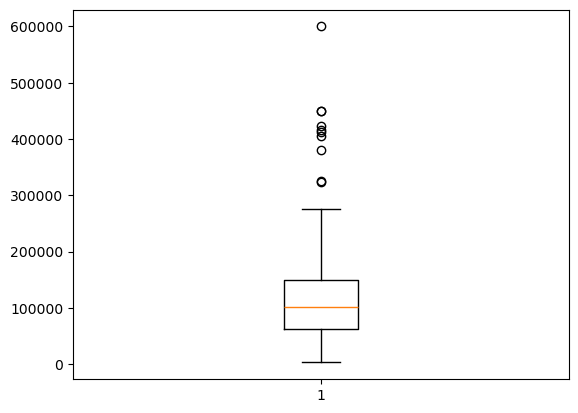

In [18]:
#boxplot using matplotlib

plt.boxplot(df.salary_in_usd)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 12., 21.]),
 array([0.00e+00, 2.00e+00, 4.00e+00, 8.00e+00, 4.00e+01, 8.00e+01,
        1.60e+02, 3.20e+02, 6.40e+02, 1.32e+03, 2.64e+03, 5.20e+03,
        1.04e+04, 2.08e+04]),
 <BarContainer object of 13 artists>)

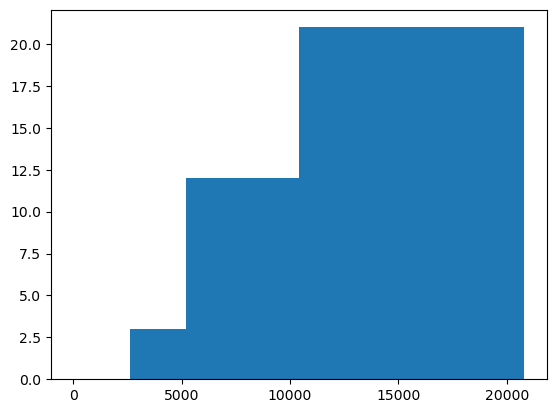

In [23]:
#histogram using Matplotlib

#note the values in "bins" are the boundaries of the boxes in the histogram

plt.hist(df.salary_in_usd,bins=[0,2,4,8,40,80,160,320,640,1320,2640,5200,10400, 20800])

In [27]:
import pandas as pd

def calculate_average_salaries(csv_file):
    """
    Calculates and displays average salaries (truncated to whole numbers) in USD by experience level and location.

    Args:
        csv_file (str): Path to the CSV file containing salary data.
    """
    try:
        df = pd.read_csv(csv_file)

        # Ensure salary_in_usd is numeric and handle potential errors
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'experience_level', 'company_location'])

        # Calculate average salaries by experience level and location
        average_salaries = df.groupby(['experience_level', 'company_location'])['salary_in_usd'].mean().reset_index()

        # Rename the average salary column
        average_salaries = average_salaries.rename(columns={'salary_in_usd': 'average_salary_usd'})

        # Truncate average salaries to whole numbers
        average_salaries['average_salary_usd'] = average_salaries['average_salary_usd'].astype(int)

        # Display the results as a table
        print(average_salaries.to_string(index=False))

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage (replace 'r project data-1.csv' with your actual file path)
calculate_average_salaries("r project data-1.csv")

experience_level company_location  average_salary_usd
              EN               AS               18053
              EN               AU              118351
              EN               CA               57132
              EN               CH                5882
              EN               CN              100000
              EN               CO               21844
              EN               CZ               31875
              EN               DE               57551
              EN               DK               37252
              EN               DZ              100000
              EN               ES               10354
              EN               FR               47325
              EN               GB               65604
              EN               IN               19629
              EN               IQ              100000
              EN               IT               21669
              EN               JP               41689
              EN            

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_salary_boxplot(csv_file):
    """
    Creates a boxplot of salary by experience level, colored by company location.

    Args:
        csv_file (str): Path to the CSV file.
    """
    try:
        df = pd.read_csv(csv_file)

        # Ensure salary_in_usd is numeric and handle potential errors
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'experience_level', 'company_location'])

        # Create the boxplot
        plt.figure(figsize=(12, 8))  # Adjust figure size as needed
        sns.boxplot(x='experience_level', y='salary_in_usd', hue='company_location', data=df)
        plt.title('Salary Distribution by Experience Level and Location')
        plt.xlabel('Experience Level')
        plt.ylabel('Salary (USD)')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")



In [75]:
import pandas as pd

def calculate_and_sort_average_salary_by_location(csv_file):
    """
    Calculates and prints the average salary by location, sorted from highest to lowest,
    and formats the salaries as US dollars.
    """
    try:
        df = pd.read_csv(csv_file)

        # Ensure salary is numeric and handle potential errors
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'company_location'])

        # Calculate average salary by location
        average_salaries = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

        # Rename the average salary column
        average_salaries = average_salaries.rename(columns={'salary_in_usd': 'average_salary_usd'})

        # Sort average salaries from highest to lowest BEFORE formatting.
        sorted_salaries = average_salaries.sort_values(by='average_salary_usd', ascending=False)

        # Format average salary as US dollars AFTER sorting.
        sorted_salaries['average_salary_usd'] = sorted_salaries['average_salary_usd'].apply(lambda x: f"${x:,.2f}")

        # Print the sorted table
        print(sorted_salaries.to_string(index=False))

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
calculate_and_sort_average_salary_by_location("r project data-1.csv")
        
        

company_location average_salary_usd
              RU        $157,500.00
              US        $144,055.26
              NZ        $125,000.00
              IL        $119,059.00
              JP        $114,127.33
              AU        $108,042.67
              AE        $100,000.00
              DZ        $100,000.00
              IQ        $100,000.00
              CA         $99,823.73
              SG         $89,294.00
              BE         $85,699.00
              DE         $81,887.21
              GB         $81,583.04
              AT         $72,920.75
              CN         $71,665.50
              IE         $71,444.00
              PL         $66,082.50
              CH         $64,114.00
              FR         $63,970.67
              SI         $63,831.00
              RO         $60,000.00
              NL         $54,945.75
              DK         $54,386.33
              ES         $53,060.14
              GR         $52,293.09
              CZ         $50

DataFrame length after cleaning: 607
First few rows of DataFrame:
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  


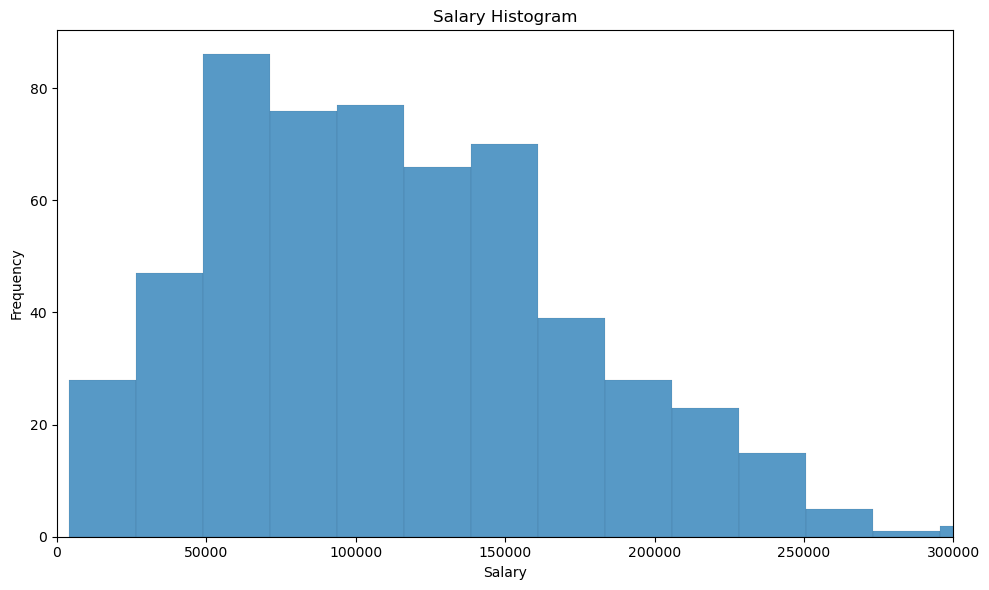

Graph code ran successfully.


In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

def create_adjusted_histogram(csv_file, x_axis_max):
    """
    Creates a histogram of salary with an adjusted x-axis range.
    Includes debugging prints and backend selection.
    """
    try:
        #matplotlib.use('TkAgg') # Try a different backend if needed (e.g., 'Qt5Agg')
        df = pd.read_csv(csv_file)
        df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
        df = df.dropna(subset=['salary'])

        print(f"DataFrame length after cleaning: {len(df)}")
        print("First few rows of DataFrame:")
        print(df.head())
        print("DataFrame data types:")
        print(df.dtypes)

        if df.empty:
            print("DataFrame is empty after cleaning. No histogram to display.")
            return

        plt.figure(figsize=(10, 6))
        sns.histplot(df, x="salary")
        plt.xlim(0, x_axis_max)
        plt.title("Salary Histogram")
        plt.xlabel("Salary")
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

        print("Graph code ran successfully.")

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

create_adjusted_histogram("r project data-1.csv", 300000)



DataFrame length after cleaning: 607
First few rows of DataFrame:
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  


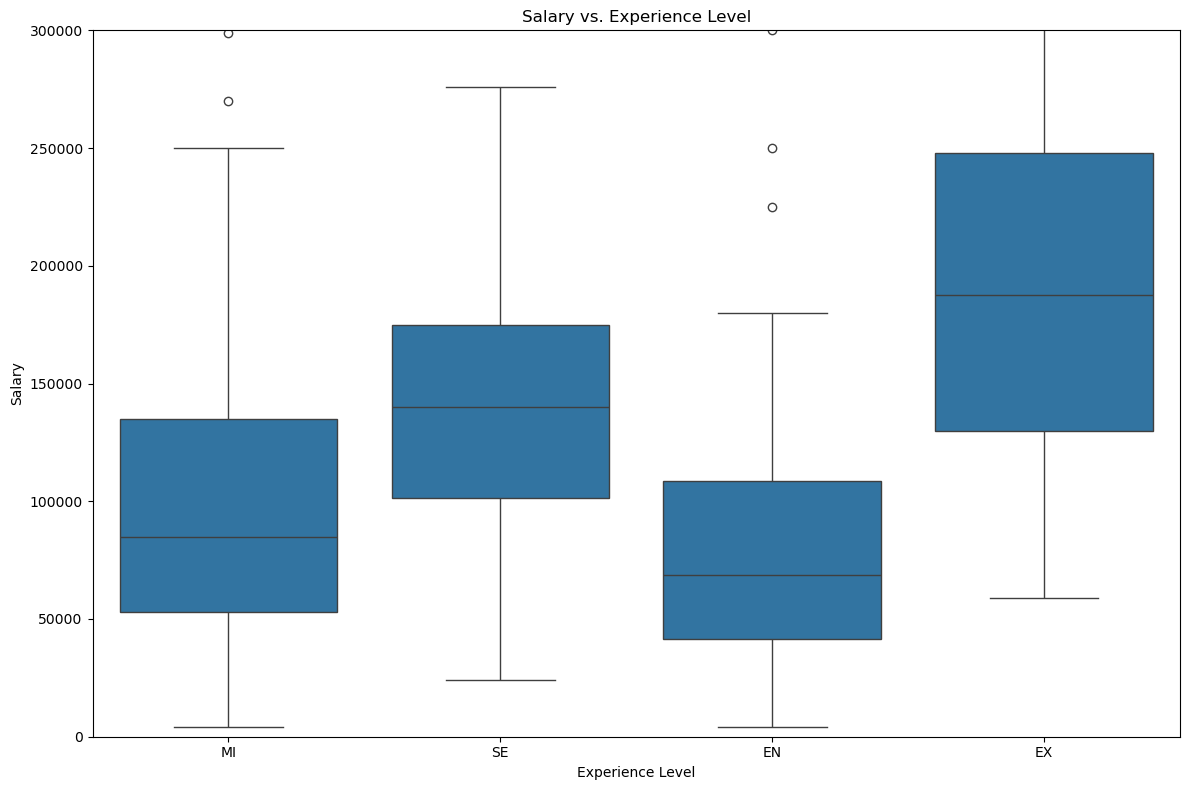

Boxplot code ran successfully.


In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

def create_salary_boxplot_by_level(csv_file, y_axis_max):
    """
    Creates a boxplot of salary versus experience level with adjusted y-axis.
    Includes debugging prints and backend selection.
    """
    try:
        #matplotlib.use('TkAgg') # Try a different backend if needed (e.g., 'Qt5Agg')
        df = pd.read_csv(csv_file)
        df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
        df = df.dropna(subset=['salary', 'experience_level'])

        print(f"DataFrame length after cleaning: {len(df)}")
        print("First few rows of DataFrame:")
        print(df.head())
        print("DataFrame data types:")
        print(df.dtypes)

        if df.empty:
            print("DataFrame is empty after cleaning. No boxplot to display.")
            return

        plt.figure(figsize=(12, 8))
        sns.boxplot(x="experience_level", y="salary", data=df)
        plt.ylim(0, y_axis_max) #adjust the y axis.
        plt.title("Salary vs. Experience Level")
        plt.xlabel("Experience Level")
        plt.ylabel("Salary")
        plt.tight_layout()
        plt.show()

        print("Boxplot code ran successfully.")

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

create_salary_boxplot_by_level("r project data-1.csv", 300000) #adjust 300000 as needed.

        

DataFrame length after cleaning: 607
First few rows of DataFrame:
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  


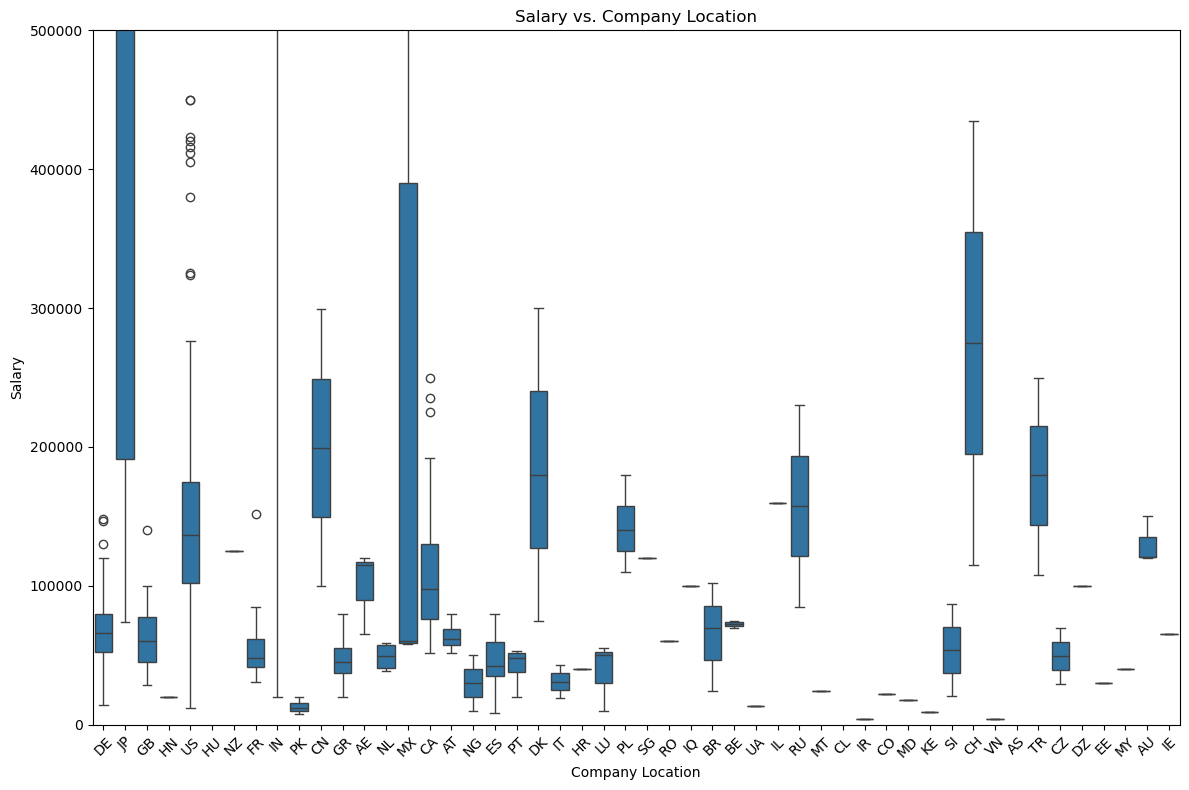

Boxplot code ran successfully.


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

def create_salary_boxplot_by_location(csv_file, y_axis_max):
    """
    Creates a boxplot of salary versus company location with adjusted y-axis.
    Includes debugging prints and backend selection.
    """
    try:
        #matplotlib.use('TkAgg') # Try a different backend if needed (e.g., 'Qt5Agg')
        df = pd.read_csv(csv_file)
        df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
        df = df.dropna(subset=['salary', 'company_location'])

        print(f"DataFrame length after cleaning: {len(df)}")
        print("First few rows of DataFrame:")
        print(df.head())
        print("DataFrame data types:")
        print(df.dtypes)

        if df.empty:
            print("DataFrame is empty after cleaning. No boxplot to display.")
            return

        plt.figure(figsize=(12, 8))
        sns.boxplot(x="company_location", y="salary", data=df)
        plt.ylim(0, y_axis_max) #adjust the y axis.
        plt.title("Salary vs. Company Location")
        plt.xlabel("Company Location")
        plt.ylabel("Salary")
        plt.xticks(rotation=45) #rotate x axis labels.
        plt.tight_layout()
        plt.show()

        print("Boxplot code ran successfully.")

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# to use .5:
#create_salary_boxplot_by_location("r project data-1.csv", 0.5)

# to use 500000:
create_salary_boxplot_by_location("r project data-1.csv", 500000)
       

In [77]:


import pandas as pd

def calculate_and_sort_average_salary_by_location(csv_file):
    """
    Calculates and prints the average salary by location, sorted from highest to lowest,
    and formats the salaries as US dollars.
    """
    try:
        df = pd.read_csv(csv_file)

        # Ensure salary is numeric and handle potential errors
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'company_location'])

        # Calculate average salary by location
        average_salaries = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

        # Rename the average salary column
        average_salaries = average_salaries.rename(columns={'salary_in_usd': 'average_salary_usd'})

        # Sort average salaries from highest to lowest BEFORE formatting.
        sorted_salaries = average_salaries.sort_values(by='average_salary_usd', ascending=False)

        # Format average salary as US dollars AFTER sorting.
        sorted_salaries['average_salary_usd'] = sorted_salaries['average_salary_usd'].apply(lambda x: f"${x:,.2f}")

        # Print the sorted table
        print(sorted_salaries.to_string(index=False))

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
calculate_and_sort_average_salary_by_location("r project data-1.csv")

company_location average_salary_usd
              RU        $157,500.00
              US        $144,055.26
              NZ        $125,000.00
              IL        $119,059.00
              JP        $114,127.33
              AU        $108,042.67
              AE        $100,000.00
              DZ        $100,000.00
              IQ        $100,000.00
              CA         $99,823.73
              SG         $89,294.00
              BE         $85,699.00
              DE         $81,887.21
              GB         $81,583.04
              AT         $72,920.75
              CN         $71,665.50
              IE         $71,444.00
              PL         $66,082.50
              CH         $64,114.00
              FR         $63,970.67
              SI         $63,831.00
              RO         $60,000.00
              NL         $54,945.75
              DK         $54,386.33
              ES         $53,060.14
              GR         $52,293.09
              CZ         $50

In [79]:
import pandas as pd

def calculate_and_sort_average_salary_and_level_counts(csv_file):
    """
    Calculates average salary by location, counts occurrences of each experience level,
    sorts by average salary (highest to lowest), and formats salaries as US dollars.
    """
    try:
        df = pd.read_csv(csv_file)

        # Ensure salary is numeric and handle potential errors
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'company_location', 'experience_level'])

        # Calculate average salary by location
        average_salaries = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
        average_salaries = average_salaries.rename(columns={'salary_in_usd': 'average_salary_usd'})

        # Count occurrences of each experience level by location
        level_counts = df.groupby(['company_location', 'experience_level']).size().unstack(fill_value=0)

        # Merge average salaries and level counts
        result = pd.merge(average_salaries, level_counts, on='company_location')

        # Sort average salaries from highest to lowest BEFORE formatting.
        result_sorted = result.sort_values(by='average_salary_usd', ascending=False)

        # Format average salary as US dollars AFTER sorting.
        result_sorted['average_salary_usd'] = result_sorted['average_salary_usd'].apply(lambda x: f"${x:,.2f}")

        # Print the sorted table
        print(result_sorted.to_string(index=False))

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
calculate_and_sort_average_salary_and_level_counts("r project data-1.csv")

company_location average_salary_usd  EN  EX  MI  SE
              RU        $157,500.00   0   2   0   0
              US        $144,055.26  31  16  90 218
              NZ        $125,000.00   0   0   0   1
              IL        $119,059.00   0   0   1   0
              JP        $114,127.33   1   0   3   2
              AU        $108,042.67   2   0   1   0
              AE        $100,000.00   0   0   1   2
              DZ        $100,000.00   1   0   0   0
              IQ        $100,000.00   1   0   0   0
              CA         $99,823.73   3   2  10  15
              SG         $89,294.00   0   0   1   0
              BE         $85,699.00   0   0   1   1
              DE         $81,887.21  11   2   8   7
              GB         $81,583.04   5   0  30  12
              AT         $72,920.75   0   0   3   1
              CN         $71,665.50   1   0   1   0
              IE         $71,444.00   0   0   0   1
              PL         $66,082.50   0   1   3   0
            

In [87]:
import pandas as pd
import os

def calculate_and_sort_average_salary_per_level_by_location(csv_file):
    """
    Calculates average salary per experience level by location,
    sorts by overall average salary (highest to lowest), and formats salaries as US dollars,
    truncating decimals.
    """
    try:
        print(f"Current working directory: {os.getcwd()}")
        df = pd.read_csv(csv_file)
        print(f"DataFrame length after read: {len(df)}")
        print(df.head())
        df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
        df = df.dropna(subset=['salary_in_usd', 'company_location', 'experience_level'])
        print(f"DataFrame length after dropna: {len(df)}")

        # Calculate overall average salary by location
        overall_average_salaries = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
        overall_average_salaries = overall_average_salaries.rename(columns={'salary_in_usd': 'average_salary_usd'})

        # Calculate average salary per experience level by location
        level_average_salaries = df.groupby(['company_location', 'experience_level'])['salary_in_usd'].mean().unstack(fill_value=0)

        # Merge overall and level average salaries
        result = pd.merge(overall_average_salaries, level_average_salaries, on='company_location')

        # Sort overall average salaries from highest to lowest BEFORE formatting.
        result_sorted = result.sort_values(by='average_salary_usd', ascending=False)

        # Truncate and format average salaries as US dollars AFTER sorting.
        result_sorted['average_salary_usd'] = result_sorted['average_salary_usd'].apply(lambda x: f"${int(x):,}")
        for col in level_average_salaries.columns:
            result_sorted[col] = result_sorted[col].apply(lambda x: f"${int(x):,}")

        # Print the sorted table
        print(result_sorted.to_string(index=False))

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
calculate_and_sort_average_salary_per_level_by_location("r project data-1.csv")
       


Current working directory: C:\Users\petea
DataFrame length after read: 607
   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE       